In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34855 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34855 non-null  object        
 1   Address        34855 non-null  object        
 2   Rooms          34855 non-null  int64         
 3   Type           34855 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34855 non-null  object        
 6   SellerG        34855 non-null  object        
 7   Date           34855 non-null  datetime64[ns]
 8   Distance       34854 non-null  float64       
 9   Postcode       34854 non-null  float64       
 10  Bedroom2       26638 non-null  float64       
 11  Bathroom       26629 non-null  float64       
 12  Car            26127 non-null  float64       
 13  Landsize       23045 non-null  float64       
 14  BuildingArea   13740 non-null  float64       
 15  YearBuilt      1554

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df.duplicated().sum()
df.drop_duplicates(keep = False , inplace= True)

In [8]:
# converts to a datetime feature
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.dropna(subset=['Price'], inplace=True)
df.dropna(subset=['Longtitude'], inplace=True)
df.dropna(subset=['Lattitude'], inplace=True)
df.dropna(subset=['CouncilArea'], inplace=True)

In [21]:
df['Car'].fillna(df['Car'].value_counts().index[0], inplace= True)
df['Landsize'].fillna(df['Landsize'].mean(), inplace= True)
df['BuildingArea'].fillna(df['BuildingArea'].mean(), inplace= True)
df['Distance'].fillna(df['Distance'].value_counts().index[0], inplace= True)
df['Postcode'].fillna(df['Postcode'].value_counts().index[0], inplace= True)
df['Regionname'].fillna(df['Regionname'].value_counts().index[0], inplace= True)
df['Propertycount'].fillna(df['Propertycount'].value_counts().index[0], inplace= True)

In [22]:
df.dropna(subset=['Bedroom2'], inplace=True)
df.dropna(subset=['Bathroom'], inplace=True)
df.dropna(subset=['YearBuilt'], inplace=True)

In [23]:
#Detecting Outliers using IQR
Outlier = []
def IQR_Outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    Lower = Q1 - 1.5 * IQR
    Upper = Q3 + 1.5 * IQR
    for i in df:
        if i > Upper or i < Lower:
            Outlier.append(i)
    print("Outliers:", Outlier)

<AxesSubplot:xlabel='Bedroom2'>

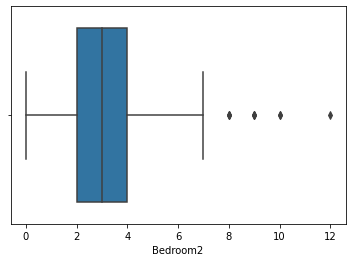

In [24]:
sns.boxplot(df['Bedroom2'])

<AxesSubplot:xlabel='Rooms'>

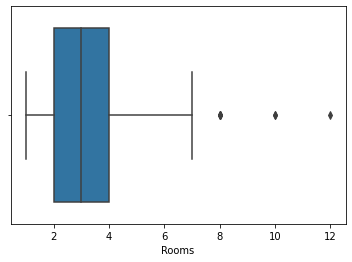

In [25]:
sns.boxplot(df['Rooms'])

<AxesSubplot:xlabel='Price'>

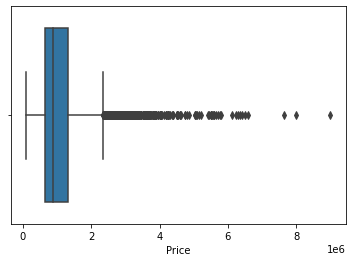

In [26]:
sns.boxplot(df['Price'])

<AxesSubplot:xlabel='Distance'>

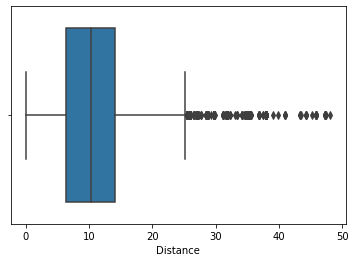

In [27]:
sns.boxplot(df['Distance'])

<AxesSubplot:xlabel='Car'>

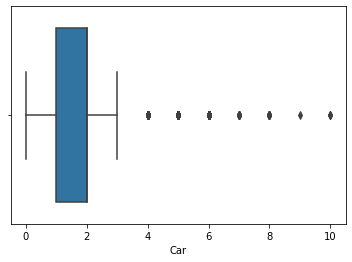

In [28]:
sns.boxplot(df['Car'])

<AxesSubplot:xlabel='YearBuilt'>

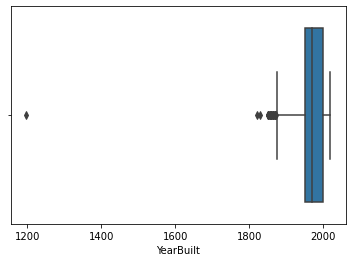

In [29]:
sns.boxplot(df['YearBuilt'])

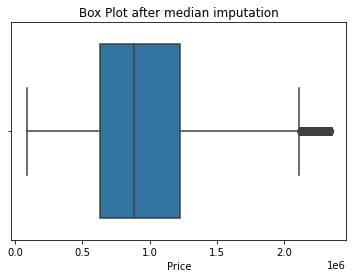

In [30]:
#Dealing with Price Outliers
#Median Imputation
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
med = np.median(df['Price'])
for i in df['Price']:
    if i > Upper or i < Lower:
            df['Price'] = df['Price'].replace(i, med)
sns.boxplot(df['Price'])
plt.title("Box Plot after median imputation")
plt.show()   

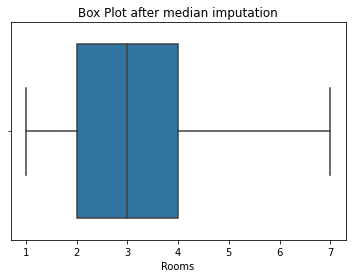

In [31]:
#Dealing with Rooms Outliers
#Median Imputation
Q1 = df['Rooms'].quantile(0.25)
Q3 = df['Rooms'].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
med = np.median(df['Rooms'])
for i in df['Rooms']:
    if i > Upper or i < Lower:
            df['Rooms'] = df['Rooms'].replace(i, med)
sns.boxplot(df['Rooms'])
plt.title("Box Plot after median imputation")
plt.show()          

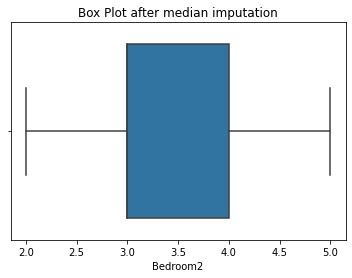

In [32]:
#Dealing with Bedroom2 Outliers
#Median Imputation
Q1 = df['Bedroom2'].quantile(0.25)
Q3 = df['Bedroom2'].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
med = np.median(df['Bedroom2'])
for i in df['Bedroom2']:
    if i > Upper or i < Lower:
            df['Bedroom2'] = df['Bedroom2'].replace(i, med)
sns.boxplot(df['Bedroom2'])
plt.title("Box Plot after median imputation")
plt.show()   

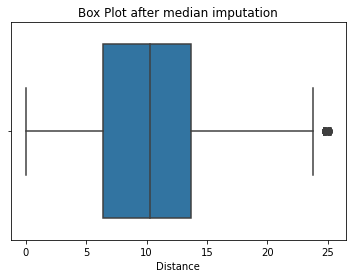

In [32]:
#Dealing with Distance Outliers
#Median Imputation
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
med = np.median(df['Distance'])
for i in df['Distance']:
    if i > Upper or i < Lower:
            df['Distance'] = df['Distance'].replace(i, med)
sns.boxplot(df['Distance'])
plt.title("Box Plot after median imputation")
plt.show() 

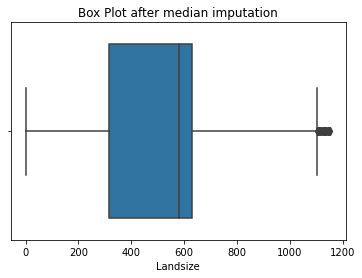

In [34]:
#Dealing with Outliers
#Median Imputation
Q1 = df['Landsize'].quantile(0.25)
Q3 = df['Landsize'].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
med = np.median(df['Landsize'])
for i in df['Landsize']:
    if i > Upper or i < Lower:
            df['Landsize'] = df['Landsize'].replace(i, med)
sns.boxplot(df['Landsize'])
plt.title("Box Plot after median imputation")
plt.show() 

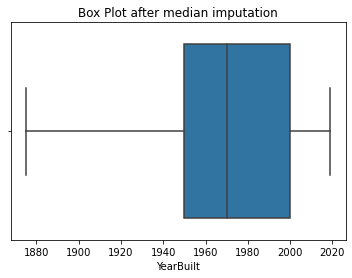

In [33]:
#Dealing with YearBuilt Outliers
#Median Imputation
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
med = np.median(df['YearBuilt'])
for i in df['YearBuilt']:
    if i > Upper or i < Lower:
            df['YearBuilt'] = df['YearBuilt'].replace(i, med)
sns.boxplot(df['YearBuilt'])
plt.title("Box Plot after median imputation")
plt.show() 

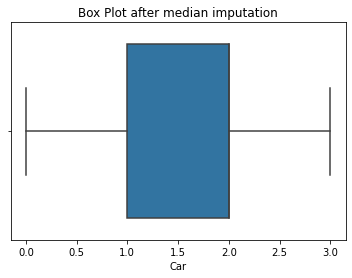

In [34]:
#Dealing with Car Outliers
#Median Imputation
Q1 = df['Car'].quantile(0.25)
Q3 = df['Car'].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
meen = np.mean(df['Car'])
for i in df['Car']:
    if i > Upper or i < Lower:
            df['Car'] = df['Car'].replace(i, meen)
sns.boxplot(df['Car'])
plt.title("Box Plot after median imputation")
plt.show() 

In [35]:
df['Regionname'].value_counts()

Southern Metropolitan         3739
Northern Metropolitan         3520
Western Metropolitan          2668
Eastern Metropolitan          1364
South-Eastern Metropolitan     555
Northern Victoria               90
Eastern Victoria                76
Western Victoria                63
Name: Regionname, dtype: int64

In [36]:
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [59]:
df1 = df.copy()

In [60]:
df1.drop(['Date', 'Address'], axis = 1, inplace = True)

In [61]:
df1 = pd.get_dummies(df1, columns = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG','CouncilArea', 'Regionname'], drop_first=True)

In [62]:
#Split the Data Set
X = df1.drop('Price', axis=1)

In [63]:
Y = df1['Price']

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12075 entries, 2 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12075 non-null  object 
 1   Rooms          12075 non-null  int64  
 2   Type           12075 non-null  object 
 3   Price          12075 non-null  float64
 4   Method         12075 non-null  object 
 5   SellerG        12075 non-null  object 
 6   Distance       12075 non-null  float64
 7   Postcode       12075 non-null  float64
 8   Bedroom2       12075 non-null  float64
 9   Bathroom       12075 non-null  float64
 10  Car            12075 non-null  float64
 11  Landsize       12075 non-null  float64
 12  BuildingArea   12075 non-null  float64
 13  YearBuilt      12075 non-null  float64
 14  CouncilArea    12075 non-null  object 
 15  Lattitude      12075 non-null  float64
 16  Longtitude     12075 non-null  float64
 17  Regionname     12075 non-null  object 
 18  Proper

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [71]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Predicting the Test set results
y_hat = lr.predict(X_test)

In [72]:
print('MSE:', metrics.mean_squared_error(Y_test, y_hat))

MSE: 75159277230.2038


In [67]:
df2=df.copy()

In [105]:
#Linear Regression Using only Numerical Data
X= df2[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'Lattitude', 'Longtitude','Propertycount']]
y = df2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [107]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [108]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 133322573560.25842


In [113]:
# Compare predicted and actual values
comp = pd.DataFrame({'Actual': np.round(y_test, 2), 
                   'Predicted': np.round(y_pred, 2)})
comp.head(10)

,Actual,Predicted
8728,935000.0,1442553.27
285,781000.0,845064.92
25094,1165000.0,1027746.17
30873,700500.0,795851.37
23665,955000.0,876624.50
20043,864000.0,930642.55
29611,455000.0,661777.90
31782,772000.0,974534.52
20252,400000.0,399241.02
10161,990000.0,1164168.47


In [76]:
# Compare predicted and actual values
comp = pd.DataFrame({'Actual': np.round(Y_test, 2), 
                   'Predicted': np.round(y_hat, 2)})
comp.head(10)

,Actual,Predicted
19406,1225000.0,1353139.59
3386,870000.0,961192.50
13879,650000.0,634094.30
832,520000.0,541180.19
1218,851000.0,947460.06
34434,660500.0,631793.45
19295,615000.0,533229.81
13399,800000.0,981625.88
14136,985100.0,1032187.59
14948,716000.0,1180726.54
